# Model Traininig

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

# import dataset

In [3]:
df=pd.read_csv("data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
X=df.drop(columns=["math score"],axis=1)

In [33]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [29]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [30]:
Y=df['math score']
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [31]:
# get how many different values are there in each type of column
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


# create a pipeline

In [32]:
# seperate the numerical and categorical features
numerical_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns

In [34]:
numerical_features,categorical_features

(Index(['reading score', 'writing score'], dtype='object'),
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course'],
       dtype='object'))

In [35]:
# do one hot encoding and standard scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

standard_scaler=StandardScaler()
onehot_encoder=OneHotEncoder()

preprocessor=ColumnTransformer(
    transformers=[
        ("onehot",onehot_encoder,categorical_features), #step 1
        ("scaler",standard_scaler,numerical_features)  #step 2 , both will happen in sequence
    ]
)

In [36]:
# now preprocessor will be used to fit
preprocessor

,transformers,"[('onehot', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [37]:
X=preprocessor.fit_transform(X)


In [40]:
X.shape

(1000, 19)

In [41]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)
X_train.shape,X_test.shape

((850, 19), (150, 19))

In [43]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [44]:
# create models

models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train,y_train) #training the model
    
    # make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    # evaluate the train and test dataset, based on original and predicted y values
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)   
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n') 

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3454
- Mean Absolute Error: 4.2784
- R2 Score: 0.8718
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2528
- Mean Absolute Error: 4.0774
- R2 Score: 0.8947


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6381
- Mean Absolute Error: 5.2625
- R2 Score: 0.8022
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4214
- Mean Absolute Error: 4.9760
- R2 Score: 0.8426


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3456
- Mean Absolute Error: 4.2769
- R2 Score: 0.8717
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2513
- Mean Absolute Error: 4.0740
- R2 Score: 0.8947


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7308
- Mean Absolute Error: 4.5449
- R2 Score: 0.8526
-----------------------

In [46]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["model name","r2_score"]).sort_values(by=["r2_score"],ascending=False)

,model name,r2_score
2,Ridge,0.894717
0,Linear Regression,0.894655
5,Random Forest Regressor,0.867732
8,AdaBoost Regressor,0.865312
7,CatBoosting Regressor,0.860337
6,XGBRegressor,0.848378
1,Lasso,0.842570
3,K-Neighbors Regressor,0.785609
4,Decision Tree,0.724801


# Linear Regression

In [47]:
model_linear=LinearRegression(fit_intercept=True)
model_linear=model_linear.fit(X_train,y_train)

# predict y
y_pred=model_linear.predict(X_test)

score=r2_score(y_test,y_pred)

print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 0.89


Text(0, 0.5, 'predicted')

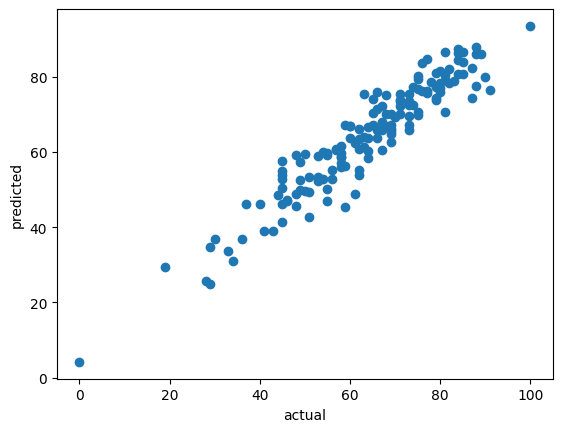

In [49]:
# plot the actual vs predicted values
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")

<Axes: xlabel='math score'>

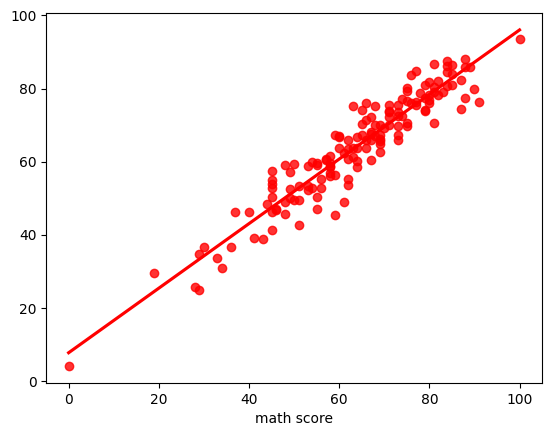

In [52]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')


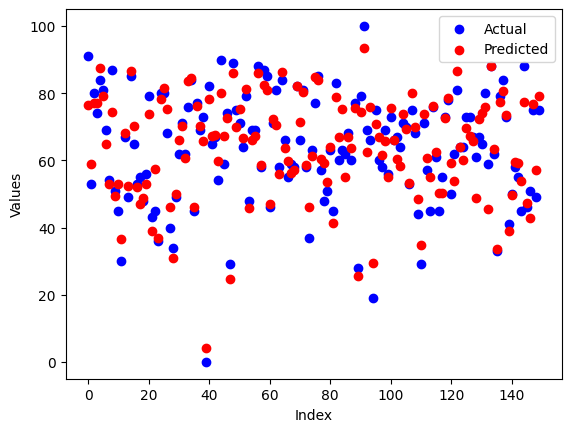

In [53]:

plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted")

plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.show()

In [54]:
#check for difference between predicted and actual values
predicted_difference=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
predicted_difference 

,Actual Value,Predicted Value,Difference
521,91,76.351405,14.648595
737,53,58.803572,-5.803572
740,80,76.932170,3.067830
660,74,77.157959,-3.157959
411,84,87.489734,-3.489734
...,...,...,...
914,46,47.167250,-1.167250
810,51,42.813650,8.186350
244,75,76.656834,-1.656834
822,49,57.247662,-8.247662
